In [1]:
from py_files import get_crew_from_api
crew_df = get_crew_from_api.main()

Pulled crew data from Pixel Starships API.
Wrote data to excel file.
Wrote data to Wordpress db.
Here's your data frame!


In [2]:
# from py_files import get_prestige_from_api
# prestige_df = get_prestige_from_api.main(crew_df['CharacterDesignId'].values)

In [3]:
# prestige_df.info()

In [4]:
from py_files import get_manual_grades
grades_df = get_manual_grades.main()

retrieved manual grades from wordpress


In [5]:
from py_files import prep_model_features
feats_df = prep_model_features.main(crew_df)

Normalizing crews' ability scores...
Creating binary category variables...
Scaling numeric variables...
Ready for modeling!


In [6]:
from py_files import create_model_sets
train_features, train_labels, test_features, test_labels = create_model_sets.main(feats_df, grades_df, 'Engineer')

Matching up grades with crew...
Removing ungraded crew...
The size of the model-able data is:
(211, 54)
Randomly selecting data sets...
We will use 168 training points and 42 test points.


# Model evaluation function

In [7]:
def eval_model(model, role, feats_df, grades_df):
    import matplotlib.pyplot as plt
    %matplotlib inline
    # import seaborn as sns
    # sns.set()
    
    train_features, train_labels, test_features, test_labels = create_model_sets.main(feats_df, grades_df, role, p=False)
    
    # run the model on the train/test sets    
    model.fit(train_features, train_labels)
    print("\n The model achieves an R2 value of " + str(model.score(test_features, test_labels)) + " on the " + role + " test set.")
    y_pred_test = model.predict(test_features)
    
    # for each character in the grades list, put the label in the "grade" column
    df = feats_df.copy()
    df['grade'] = None  # default is no grade
       
    for ind in range(len(grades_df)):
        g = grades_df[f"{role + 'Input'}"].values[ind]
        df.set_value(df.CharacterDesignId == grades_df['CharacterDesignId'].values[ind], 'grade', g)
    
    graded_crew = df[df.grade.isnull() == False].reset_index(drop=True)
    y_pred_all = model.predict(graded_crew.drop(['CharacterDesignId', 'grade'], axis=1))
    
    # Plotting
    plt.figure(figsize = (40,10))
    boundaries = [1.5, 2.5, 3.5]
    
    # plot test grades
    plt.subplot(1,3,1)
    plt.title('Test Set Grading')
    plt.xlabel('manual grades')
    plt.ylabel('model grades')
    plt.scatter(test_labels+0.1-np.random.uniform(size=len(y_pred_test))*0.2, y_pred_test, marker ='+', color = 'blue')
    for v in boundaries:
        plt.plot([0,5], [v,v], color='gray')
    
    # plot all grades
    plt.subplot(1,3,2)
    plt.title('All Crew Grading')
    plt.xlabel('manual grades')
    plt.ylabel('model grades')
    plt.scatter(graded_crew['grade']+0.1-np.random.uniform(size=len(y_pred_all))*0.2, y_pred_all, marker ='+', color = 'blue')
    for v in boundaries:
        plt.plot([0,5], [v,v], color='gray')
        
    plt.show()
    
    return graded_crew['CharacterDesignId'], graded_crew['grade'], y_pred_all;


    # print labels that would be written wrong (wouldn't round to the right grade)
    for ind in range(len(y_pred_all)):
        if graded_crew['grade'].values[ind] > 1.9:  # only worry about 2,3,4 grades. 0 and 1 aren't going into the post
            if round(y_pred_all[ind], 0) != graded_crew['grade'].values[ind]:
                print('Prediction error: CrewId' + str(df['CharacterDesignId'].values[ind]) 
                      + ' should be ' + str(df['grade'].values[ind]) + ' but the model predicts ' + str(round(y_pred_all[ind], 2)))

In [8]:
def show_errors(ids, manual_grades, model_grades, crew_df):
        for ind in range(len(ids)):
            if manual_grades[ind] > 1.9:  # only worry about 2,3,4 grades. 0 and 1 aren't going into the post
                if round(model_grades[ind], 0) != manual_grades[ind]:
                    # bad grading
                    crewloc = crew_df['CharacterDesignId'].values.tolist().index(ids[ind])
                    crewname = crew_df['CharacterDesignName'].values[crewloc]
                    print('Prediction error: ' + crewname + 
                          ' should be ' + str(manual_grades[ind]) + ' but the model predicts ' + 
                          str(round(model_grades[ind], 2)))

# Linear Regression


 The model achieves an R2 value of 0.919533933301 on the Gunner test set.


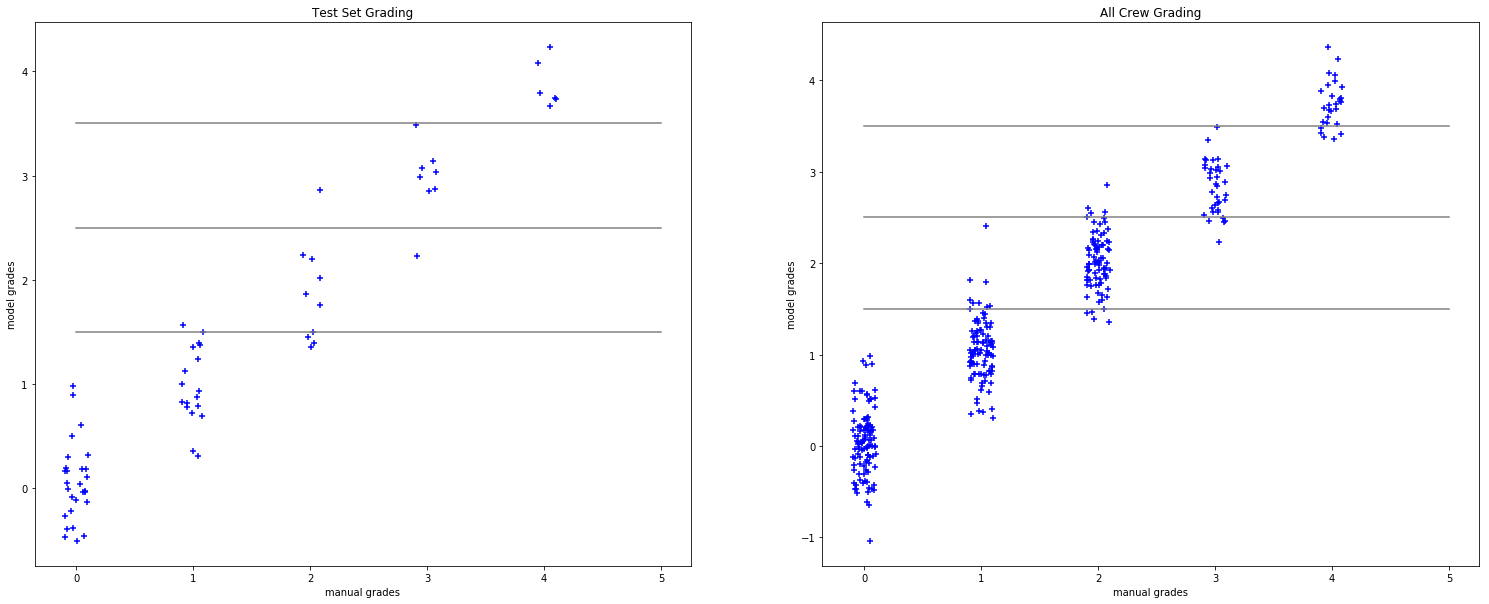

Prediction error: Monkey King should be 2.0 but the model predicts 2.55
Prediction error: Blingy Captain should be 2.0 but the model predicts 2.6
Prediction error: Liu Bei should be 2.0 but the model predicts 2.56
Prediction error: Zhang Fei should be 2.0 but the model predicts 2.86
Prediction error: Cao Cao should be 4.0 but the model predicts 3.41
Prediction error: Zhao Yun should be 4.0 but the model predicts 3.42
Prediction error: SCV should be 4.0 but the model predicts 3.36
Prediction error: Paralympic God should be 4.0 but the model predicts 3.38
Prediction error: Willy should be 4.0 but the model predicts 3.48
Prediction error: Dark Matter Legend should be 2.0 but the model predicts 1.47
Prediction error: Dr Dong should be 2.0 but the model predicts 2.5
Prediction error: Geeky Vincent should be 3.0 but the model predicts 2.45
Prediction error: Sagita should be 2.0 but the model predicts 1.35
Prediction error: Nova should be 3.0 but the model predicts 2.46
Prediction error: Arde

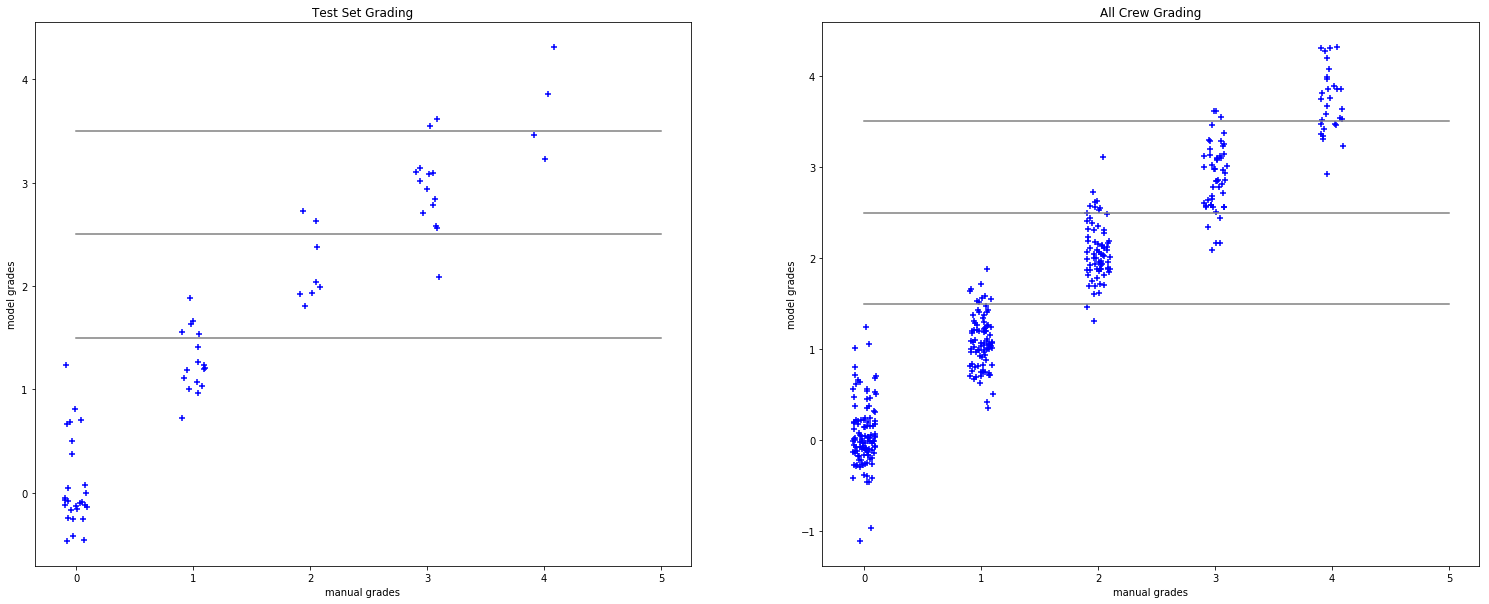

Prediction error: Menga Linuxer should be 3.0 but the model predicts 2.44
Prediction error: Thomas should be 2.0 but the model predicts 2.52
Prediction error: Eric should be 4.0 but the model predicts 3.34
Prediction error: Captain should be 2.0 but the model predicts 2.73
Prediction error: Lollita should be 4.0 but the model predicts 3.31
Prediction error: Grandpa should be 3.0 but the model predicts 2.34
Prediction error: Cara should be 2.0 but the model predicts 2.58
Prediction error: Jessica should be 2.0 but the model predicts 1.47
Prediction error: Professor Brenda should be 4.0 but the model predicts 3.48
Prediction error: Paralympic God should be 4.0 but the model predicts 3.41
Prediction error: Willy should be 4.0 but the model predicts 3.47
Prediction error: Dark Matter Hero should be 3.0 but the model predicts 3.55
Prediction error: Zakian should be 3.0 but the model predicts 2.17
Prediction error: Dark Matter Mechi should be 3.0 but the model predicts 3.62
Prediction error:

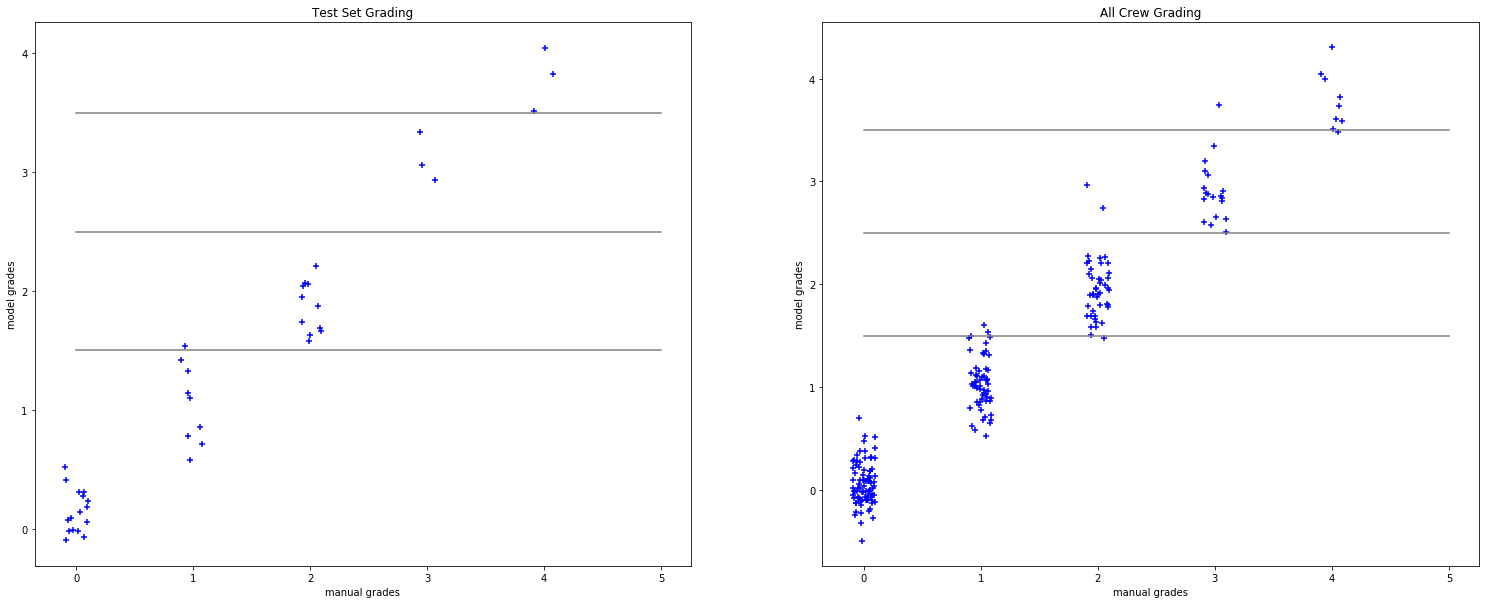

Prediction error: Mr Blue should be 2.0 but the model predicts 2.74
Prediction error: King Dong should be 2.0 but the model predicts 1.47
Prediction error: Stove Tops should be 3.0 but the model predicts 3.75
Prediction error: Whaler should be 2.0 but the model predicts 2.96
Prediction error: Nova should be 4.0 but the model predicts 3.48

 The model achieves an R2 value of 0.491309497552 on the Pilot test set.


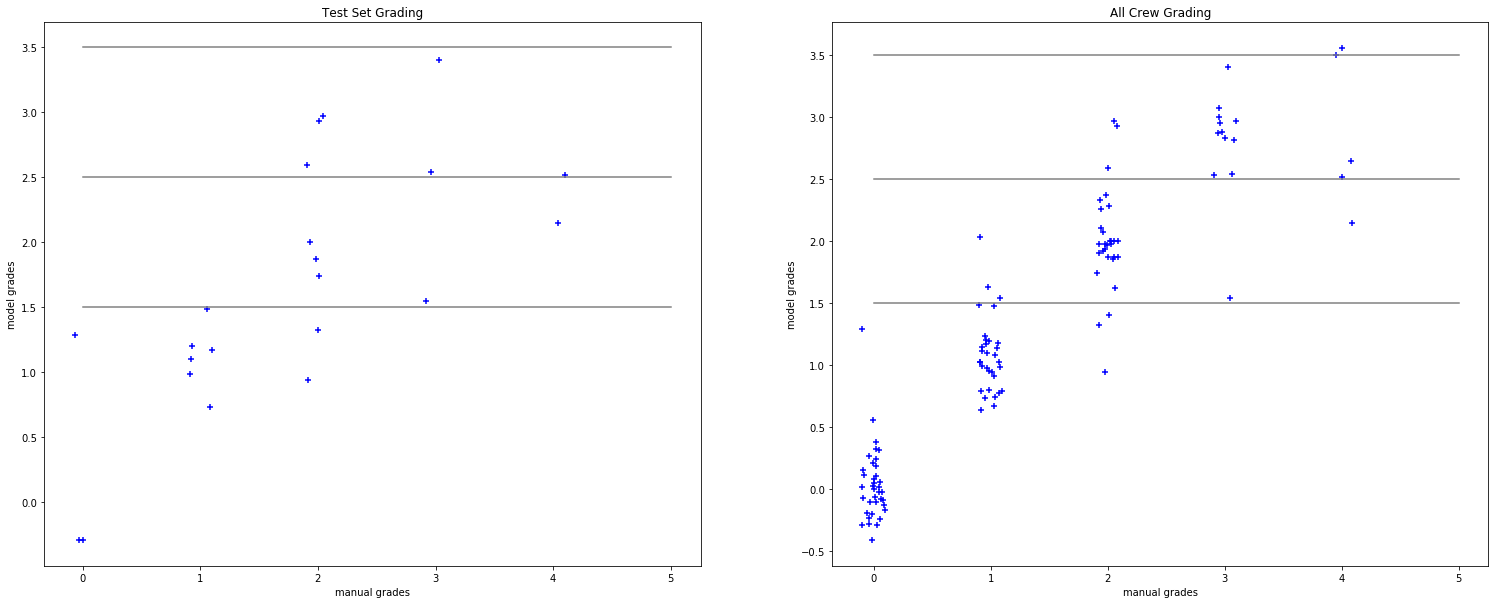

Prediction error: Invader should be 3.0 but the model predicts 1.54
Prediction error: Foxy Girl should be 2.0 but the model predicts 1.32
Prediction error: Silver Paladin should be 4.0 but the model predicts 2.65
Prediction error: Giant Chicken should be 2.0 but the model predicts 2.97
Prediction error: Phoenix should be 2.0 but the model predicts 2.93
Prediction error: Agay should be 2.0 but the model predicts 1.4
Prediction error: Pirate Michelle should be 2.0 but the model predicts 0.94
Prediction error: Miss Santa should be 4.0 but the model predicts 2.14
Prediction error: Capricorn should be 2.0 but the model predicts 2.59
Prediction error: Loong should be 4.0 but the model predicts 2.51


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# linear regression model
Regmodel = LinearRegression()
ids, manual_g, model_g = eval_model(Regmodel, 'Gunner', feats_df, grades_df)
show_errors(ids, manual_g, model_g, crew_df)

ids, manual_g, model_g = eval_model(Regmodel, 'Shielder', feats_df, grades_df)
show_errors(ids, manual_g, model_g, crew_df)

ids, manual_g, model_g = eval_model(Regmodel, 'Engineer', feats_df, grades_df)
show_errors(ids, manual_g, model_g, crew_df)

ids, manual_g, model_g = eval_model(Regmodel, 'Pilot', feats_df, grades_df)
show_errors(ids, manual_g, model_g, crew_df)

In [ ]:
# what are the most important features?
coefs = Regmodel.coef_
top_feat_inds = np.fliplr([np.argsort(coefs)[-7:]])[0]
bottom_feat_inds = np.argsort(coefs)[0:7]

# features that bring rating up
for i in top_feat_inds:
    print("The feature " + feats_df.columns.tolist()[i+1] +   # one label later, since we dropped CrewId after model_data
          " has a coefficient of " +  str(coefs[i]))
print("\n")
# features that bring rating down
for i in bottom_feat_inds:
    print("The feature " + feats_df.columns.tolist()[i+1] + 
          " has a coefficient of " +  str(coefs[i]))

# kNN


 The model achieves an R2 value of 0.785714285714 on the Gunner test set.


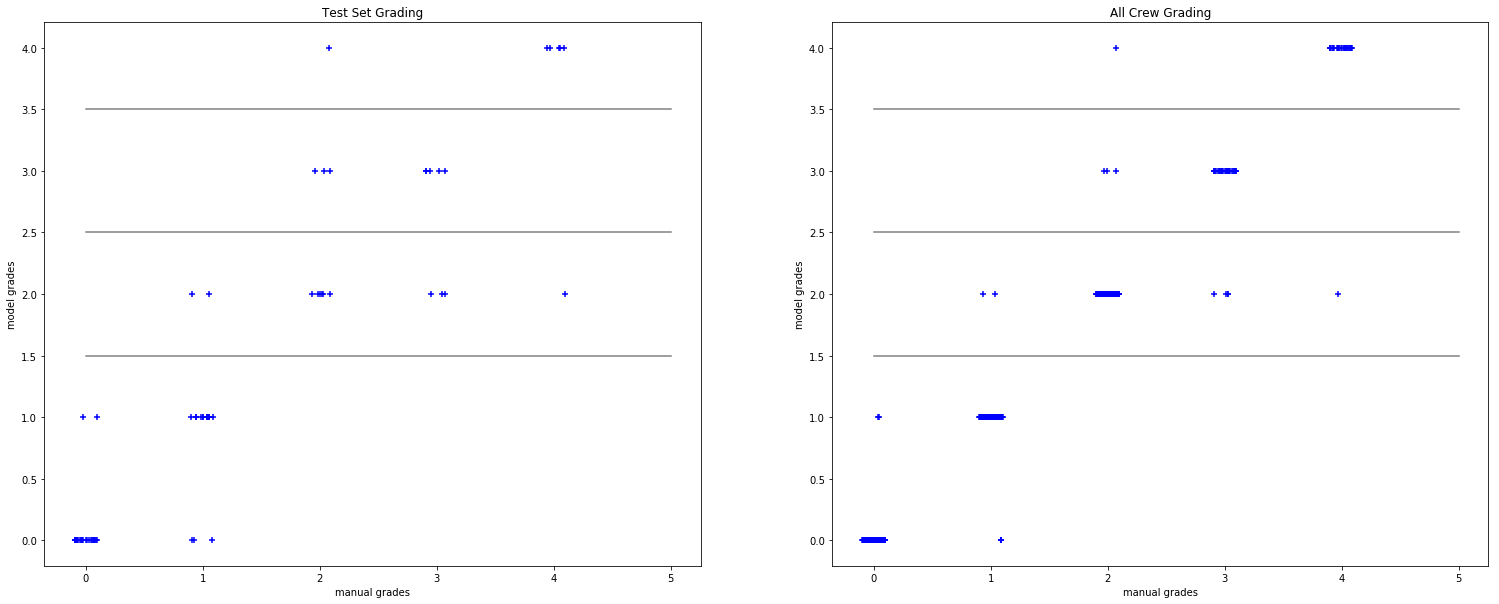

Prediction error: Mr Coconut should be 3.0 but the model predicts 2
Prediction error: Walking Skeleton should be 2.0 but the model predicts 3
Prediction error: Zhang Fei should be 2.0 but the model predicts 4
Prediction error: Agay should be 3.0 but the model predicts 2
Prediction error: Aaron should be 3.0 but the model predicts 2
Prediction error: Abbie should be 2.0 but the model predicts 3
Prediction error: Draki Soldier should be 3.0 but the model predicts 2
Prediction error: Galactic Sprite should be 2.0 but the model predicts 3
Prediction error: Namith should be 4.0 but the model predicts 2

 The model achieves an R2 value of 0.657142857143 on the Shielder test set.


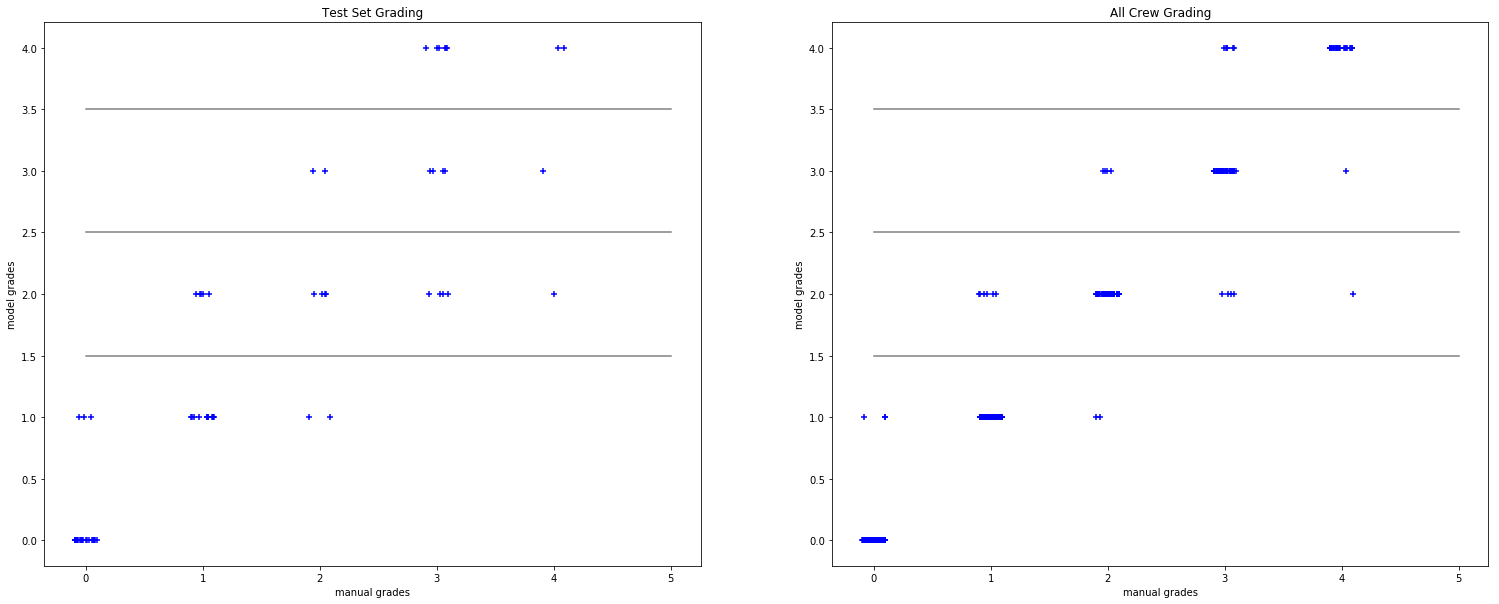

Prediction error: Captain should be 2 but the model predicts 3
Prediction error: Invader should be 3 but the model predicts 4
Prediction error: Zhang Fei should be 3 but the model predicts 4
Prediction error: Mummy should be 2 but the model predicts 1
Prediction error: Dark Matter Hero should be 3 but the model predicts 2
Prediction error: Agay should be 3 but the model predicts 4
Prediction error: Admiral Serena should be 2 but the model predicts 3
Prediction error: Sagita should be 4 but the model predicts 2
Prediction error: Tripod should be 3 but the model predicts 2
Prediction error: Drakian Clone should be 2 but the model predicts 3
Prediction error: Abbie should be 3 but the model predicts 4
Prediction error: Virgo should be 4 but the model predicts 3
Prediction error: Server Eric should be 2 but the model predicts 1
Prediction error: Draki Soldier should be 2 but the model predicts 3
Prediction error: Aries should be 3 but the model predicts 4
Prediction error: Zongzi-Man shoul

In [63]:
# linear regression model
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 1)
ids, manual_g, model_g = eval_model(kNN, 'Gunner', feats_df, grades_df)
show_errors(ids, manual_g, model_g, crew_df)

ids, manual_g, model_g = eval_model(kNN, 'Shielder', feats_df, grades_df)
show_errors(ids, manual_g, model_g, crew_df)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1,3,5,7,9]

for k in k_values:  
    
    kNN = KNeighborsClassifier(n_neighbors = k)
    kNN.fit(train_features, train_labels)
    
    # take a stab at the test set
    y_pred = kNN.predict(test_features)
    # accuracy
    acc = round(sum(y_pred == test_labels)/test_labels.shape[0],3)*100
    
    # what if you consider +/- 1 star to be still "accurate"?
    acc2 = round((
        sum(y_pred == test_labels) + 
        sum(y_pred == test_labels-1) + sum(y_pred == test_labels+1)
        )/test_labels.shape[0],3)*100
    print("The kNN classifier with k=" + str(k) + " had an accuracy of " 
          + str(acc) + "% (and a +/-1 grade accuracy of " + str(acc2) + "%)." )

In [ ]:
# use the best model: n = 1
kNN = KNeighborsClassifier(n_neighbors = 1)
kNN.fit(train_features, train_labels)

# print the values the model gets wrong
print("\nThe ratings misclassified by the classifier were: ")
y_pred = kNN.predict(test_features)
errors = test_labels[y_pred != test_labels]
print(str(y_pred[y_pred != test_labels]) + "-- predicted values")
print(str(errors) + "-- actual values")

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,2)
plt.scatter(test_labels+0.1-np.random.uniform(size=len(y_pred))*0.2, y_pred+0.1-np.random.uniform(size=len(y_pred))*0.2)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# logistic regression model
LogRegmodel = LogisticRegression(multi_class = 'multinomial', solver='newton-cg')
LogRegmodel.fit(train_features, train_labels)

print("The logistic regression model achieves an R2 value of " + str(LogRegmodel.score(test_features, test_labels)))

# print the values the model gets wrong
print("\nThe ratings misclassified by the classifier were: ")
y_pred = LogRegmodel.predict(test_features)
errors = test_labels[y_pred != test_labels]
print(str(y_pred[y_pred != test_labels]) + "-- predicted values")
print(str(errors) + "-- actual values")

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,2)
plt.scatter(test_labels+0.1-np.random.uniform(size=len(y_pred))*0.2, y_pred+0.1-np.random.uniform(size=len(y_pred))*0.2)

# Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(train_features, train_labels)

print("The perceptron model achieves an R2 value of " + str(perceptron.score(test_features, test_labels)))
y_pred = perceptron.predict(test_features)

# print the values the model gets wrong
print("\nThe ratings misclassified by the classifier were: ")
y_pred = perceptron.predict(test_features)
errors = test_labels[y_pred != test_labels]
print(str(y_pred[y_pred != test_labels]) + "-- predicted values")
print(str(errors) + "-- actual values")

# SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', degree=8)
svc.fit(train_features, train_labels)

print("The svm model achieves an R2 value of " + str(svc.score(test_features, test_labels)))
y_pred = svc.predict(test_features)

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,2)
plt.scatter(test_labels+0.1-np.random.uniform(size=len(y_pred))*0.2, y_pred+0.1-np.random.uniform(size=len(y_pred))*0.2)

 # Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train_features, train_labels)

print("The decision tree achieves an R2 value of " + str(tree.score(test_features, test_labels)))
y_pred = tree.predict(test_features)

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,2)
plt.scatter(test_labels+0.1-np.random.uniform(size=len(y_pred))*0.2, y_pred+0.1-np.random.uniform(size=len(y_pred))*0.2)